# Mileage per gallon Performance of various cars

Dataset: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

In [15]:
import pandas as pd

filename= "Auto-mpg.csv"
df = pd.read_csv(filename, header = 0)

print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0         130    3504          12.0          70
1  15.0          8         350.0         165    3693          11.5          70
2  18.0          8         318.0         150    3436          11.0          70
3  16.0          8         304.0         150    3433          12.0          70
4  17.0          8         302.0         140    3449          10.5          70


## Distribution of mileage

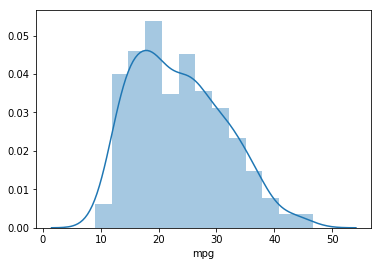

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df['mpg'])

## Plot Numerical Variables

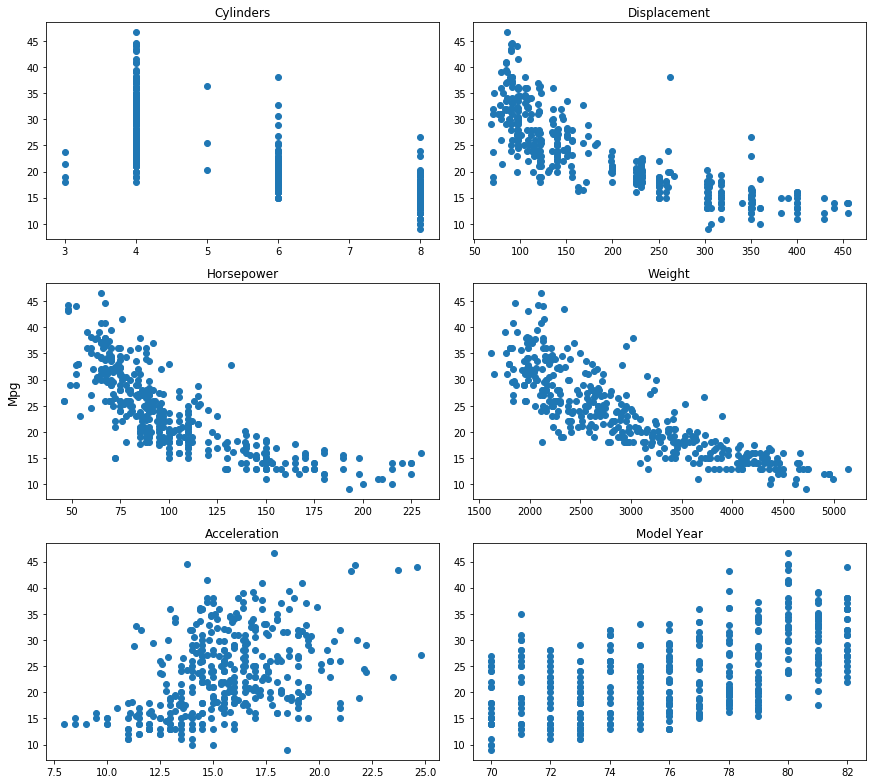

In [36]:
plt.figure(1)
f,axarr = plt.subplots(3,2, figsize=(12,11))
mpgval = df.mpg.values

axarr[0,0].scatter(df.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')

axarr[0,1].scatter(df.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')

axarr[1,0].scatter(df.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')

axarr[1,1].scatter(df.weight.values, mpgval)
axarr[1,1].set_title('Weight')

axarr[2,0].scatter(df.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')

axarr[2,1].scatter(df["model-year"].values, mpgval)
axarr[2,1].set_title('Model Year')


f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

Data Analysis:

* 4 cylinder has better mileage performance than other and most manufactured one.
* 8 cylinder engines have low mileage count. They focus more on pickup( fast cars).
* 5 cylinder, performance wise, competes none neither 4 cylinder nor 6 cylinder.
* Displacement, weight, horsepower are inversely related to mileage.
* More horsepower means low mileage.
* Year on Year Manufacturers have focussed on increasing the mileage of the engines.

## Split and Fit the model

In [37]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train.shape

(238, 6)

In [38]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.42520744330195087
The coefficient for displacement is 0.010119582225268141
The coefficient for horsepower is 0.0007646097443719571
The coefficient for weight is -0.0071345936565211845
The coefficient for acceleration is 0.049755107681416326
The coefficient for model-year is 0.7726161749108175


In [40]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -14.416258514829327


### Model Accuracy

In [41]:
regression_model.score(X_test, y_test)

0.83293806589040509

In [42]:
from sklearn.metrics import mean_squared_error
import math

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

9.9478258136979658

In [43]:
math.sqrt(regression_model_mse)

3.1540174085914563

In [44]:
regression_model.predict([[8, 307.0, 130, 3504, 12.0, 70]])

array([[ 15.06877031]])

##  Correlation between Numerical Features

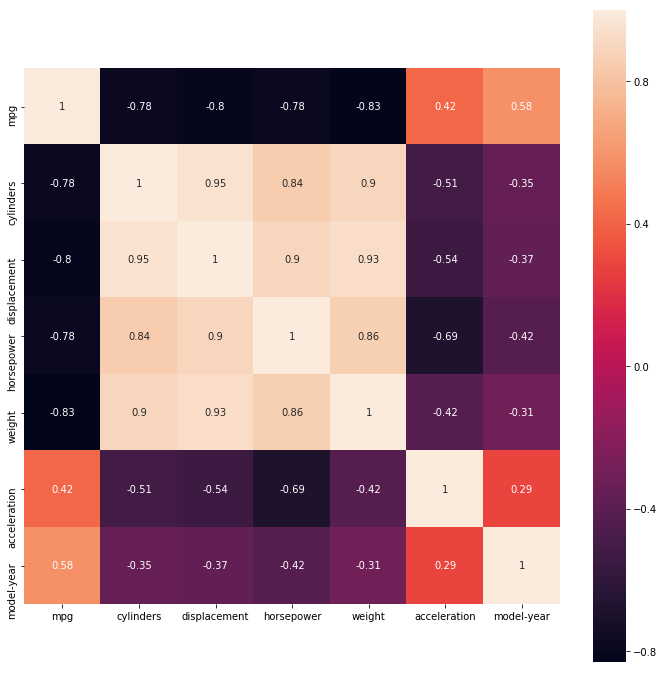

In [45]:
corr = df.select_dtypes(include=['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1, square=True, annot=True)